_Doug Branton  
Astro 425  
Homework 5_

In [78]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
from scipy.integrate import quad

## Problem 1.

We want to utilize the Friedman equation to determine values for $\Omega_m$, $\Omega_r$ and $\Omega_{\Lambda}$ in the case of a Loitering universe and a Big Crunch universe. I will be referencing Figure 6.3 in Ryden for my initial parameterizations of these two scenarios. 

We begin with the Loitering universe. This provides the condition that we must have positive curvature. Thus $\kappa=+1$. Furthermore, the Loitering universe features a negligible dependence on radiation as we are concerned with the transition from a matter dominated universe to a cosmological constant dominated universe. From this, we'll assert $\Omega_r=0$. Figure 6.3 plots $\Omega_{\Lambda}$ vs $\Omega_m$ for the Loitering universe. In theory, any point on this line will provide a Loitering universe, so I will choose $\Omega_{\Lambda}=2.0$ and $\Omega_m=0.5$ to be my initial values. Now, in order to determine direct values, we will need to search the local number space for configurations that minimize the change in a(t) over time. I will impose a search region of $ \pm 0.15$.

For the Big Crunch, we will make no such assumptions on any parameters being 0. My code takes a long time to run, so I will reduce the step size for each omega space. Furthermore, my code outputs a as a function of t. Meaning that only one value a maps to a single value of t. For a big crunch universe, we expect to encounter the same scale factor at two times. Once when the universe is expanding and another when the universe is collapsing. We expect symmetry in this case, so I will reflect the plot for the expansion across the cutoff point to represent the collapse.

In [79]:
class Cosmology:
    def __init__(self, omega_r0, omega_m0, omega_cc):
        """Initialize class, generate relevant constants"""
        self.H0=70*u.km/(u.second*u.megaparsec)
        self.H0_s=(self.H0.to(1/u.second)).value
        self.H0_Gyr=(self.H0.to(1/u.gigayear)).value
        self.t0_Gyr=1/self.H0_Gyr
        self.c=(const.c).value
        self.omega_r0 = omega_r0
        self.omega_m0 = omega_m0
        self.omega_cc = omega_cc
        self.omega_0 = omega_r0 + omega_m0 + omega_cc

    def H_z(self, z):
        """Friedman Equation in terms of redshift"""
        return self.H0_s * np.sqrt(self.omega_r0 * (1.0 + z) ** 4 + self.omega_m0 * (1.0 + z) ** 3 + self.omega_cc + (1.0 - self.omega_0) * (1.0 + z) ** 2)
    def H_t(self, a):
        """Friedman Equation in terms of scale factor"""
        return self.H0_Gyr * np.sqrt(self.omega_r0 * a ** -4.0 + self.omega_m0 * a ** -3.0 + self.omega_cc + (1 - self.omega_0) * a ** -2.0)
    
    def a_to_age(self, a_space):
        """Map scale factor to age of universe"""
        model_time = lambda a: 1.0 / (a * self.H_t(a))
        age = np.asarray([quad(model_time, 0.0001, i)[0] for i in a_space])
        return age


In [80]:
#a. Loitering Universe

# Minimize gradient of a(t)
m_space=np.linspace(0.35,0.65,50) #40
cc_space=np.linspace(1.85,2.15,50) #40
a_space=np.linspace(0.0001,2, 30) #20
loiter_dict={}

for m in m_space:
    for cc in cc_space:
        loiter=Cosmology(0.0,m,cc)
        age_array=loiter.a_to_age(a_space)
        
        age_grad=np.gradient(age_array)
        a_grad=np.gradient(a_space,age_grad)
        if not np.isnan(a_grad.min()):
                loiter_dict[str(m)+" "+str(cc)] = a_grad.min()
                
print min(loiter_dict, key=loiter_dict.get).split(" ")
m_loit=float(min(loiter_dict, key=loiter_dict.get).split(" ")[0])
cc_loit=float(min(loiter_dict, key=loiter_dict.get).split(" ")[1])

C:\Users\Doug\Anaconda\Lib\site-packages\ipykernel\__main__.py:19: RuntimeWarning: invalid value encountered in sqrt


['0.417346938776', '1.88673469388']


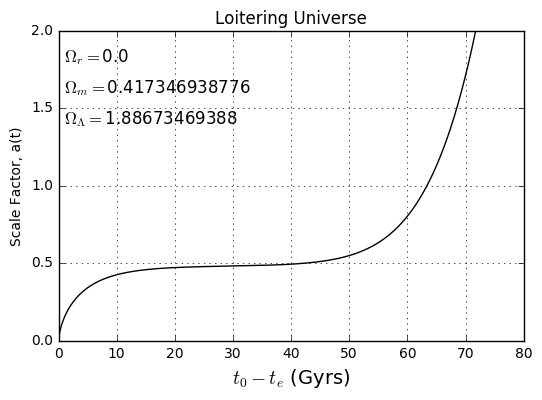

In [81]:
#Plot parameter case where a_grad is minimized
a_space=np.linspace(0.0001,2, 1000)

loiter = Cosmology(0.0, m_loit, cc_loit)
age_array=loiter.a_to_age(a_space)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(age_array,a_space,color='k')
ax.set_title("Loitering Universe")
ax.set_ylabel("Scale Factor, a(t)")
ax.set_xlabel(r"$t_0 - t_e$ (Gyrs)",fontsize=14)
ax.grid("on")
ax.text(1, 1.8, r'$\Omega_r=$'+"0.0", fontsize=12)
ax.text(1, 1.6, r'$\Omega_m=$'+str(m_loit), fontsize=12)
ax.text(1, 1.4, r'$\Omega_{\Lambda}=$'+str(cc_loit), fontsize=12)

In [128]:
#b. Big Crunch Universe

# Minimize gradient of a(t)
m_space=np.linspace(0,5.0,25) #15
r_space=np.linspace(0,6.0,25) #15
cc_space=np.linspace(-2.0,0.0,15) #10
a_space=np.linspace(0.0001,2.0, 25) #20
crunch_dict={}

for m in m_space:
    for r in r_space:
        for cc in cc_space:
            crunch=Cosmology(r,m,cc)
            age_array=crunch.a_to_age(a_space)
        
            age_grad=np.gradient(age_array)
            a_grad=np.gradient(a_space,age_grad)
            if not np.isnan(a_grad.min()):
                crunch_dict[str(m)+" "+str(r)+" "+str(cc)] = a_grad.min()
                
print min(crunch_dict, key=crunch_dict.get).split(" ")
m_crunch=float(min(crunch_dict, key=crunch_dict.get).split(" ")[0])
r_crunch=float(min(crunch_dict, key=crunch_dict.get).split(" ")[1])
cc_crunch=float(min(crunch_dict, key=crunch_dict.get).split(" ")[2])

C:\Users\Doug\Anaconda\Lib\site-packages\ipykernel\__main__.py:19: RuntimeWarning: invalid value encountered in sqrt


['1.25', '0.5', '0.0']


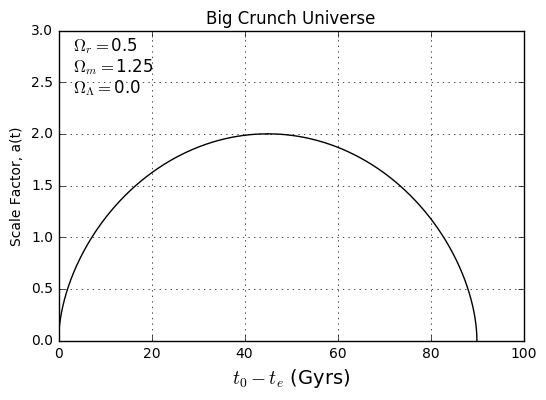

In [129]:
a_space=np.linspace(0.0001,2.0, 1000)

crunch = Cosmology(r_crunch, m_crunch, cc_crunch)
age_array_exp=crunch.a_to_age(a_space)
age_array_col=[]

#Reflect Expansion onto collapse
flip_point=age_array_exp[-1]
for ind in age_array_exp:
    flip_dist=flip_point-ind
    col_val=flip_point+flip_dist
    age_array_col.append(col_val)
    
    

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(age_array_exp,a_space,color='k')
ax.plot(age_array_col,a_space,color='k')
ax.set_title("Big Crunch Universe")
ax.set_ylabel("Scale Factor, a(t)")
ax.set_xlabel(r"$t_0 - t_e$ (Gyrs)",fontsize=14)
ax.set_ylim([0.0,3.0])
ax.set_xlim([0,100])
ax.grid("on")
ax.text(3, 2.8, r'$\Omega_r=$'+str(r_crunch), fontsize=12)
ax.text(3, 2.6, r'$\Omega_m=$'+str(m_crunch), fontsize=12)
ax.text(3, 2.4, r'$\Omega_{\Lambda}=$'+str(cc_crunch), fontsize=12)

## Problem 2.

For this problem we want to derive the velocity dispersion of a cluster of galaxies using the assumption that we have an isothermal sphere. 

We begin with the equation for the Einstein Ring:

$$ \small \theta_E^2 = \frac{4GMD_{ls}}{c^2D_lD_s} $$

We can find theta through the lens equation, $ \small\beta=\theta-\frac{\theta_E^2}{\theta}$, $\beta$ in this case is zero. Thus:

$$ \small \theta^2=\theta_E^2$$

We can rearrange the equation to find an expression for mass:

$$ \small M= \frac{\theta^2c^2D_lD_s}{4GD_{ls}} $$

From here, we know that $\theta=tan \left( \frac{r_E}{D_l} \right)$ where r_E is the Einstein Radius. This simplifies to $\theta= \frac{r_E}{D_l}$ by the small angle approximation. We can plug this into the expression for mass to find the total mass within the Einstein Radius as a function of radius:

$$ \small M= \frac{r_E^2c^2D_s}{4GD_{ls}D_l} $$

We can retrieve a density from this by assuming a uniform distribution of mass throughout a sphere of radius $r_E$:

$$\rho (r_E)= \frac{M}{V}= \left( \frac{3}{4 \pi r_E^3} \right) \frac{r_E^2c^2D_s}{4GD_{ls}D_l} = \frac{3c^2D_s}{16 \pi r_EGD_{ls}D_l}  $$

Now, we are able to use our assumption of an isothermal sphere:

$$\rho (r) = \frac{\sigma_v^2}{2 \pi G r^2}$$

$$\frac{\sigma_v^2}{2 \pi G r_E^2}=\frac{3c^2D_s}{16 \pi r_EGD_{ls}D_l}$$

Solve for the velocity dispersion:

$$\sigma_v^2= \frac{3r_ED_sc^2}{8D_sD_l}$$

In terms of $\theta$:

$$\sigma_v^2= \frac{3\theta D_sc^2}{8D_s}$$

Which yields:

$$ \sigma_v^2 \approx 10^3 \frac{km}{s} \left( \frac{\theta}{28"} \frac{D_s}{D_{ls}} \right)^{1/2}$$
